# ODEs Homework
If you see empty brackets, that's a placeholder; fill in the correct expression.

All variables marked with a `TODO` will be graded by the autograder.

**Due:** Friday October 18th at 11:59pm on Gradescope

**Important:** Your code file must be named either `ode_hw.py` or `ode_hw.ipynb` in order for it to be compiled by the autograder. Please check before submitting to Gradescope.

In [1]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Exercise 1b

\begin{align*} \dot{x} = \lambda {x}, \quad x(0) = 1 \end{align*}

In [2]:
# Generate solution data
ti = 0
tf = 5
dt = 0.01
t_vec = np.arange(ti, tf+dt, dt)
L_vec = np.array([-2, -1, 0, 0.1, 0.2])
x_vec = np.array([np.exp(L * t_vec) for L in L_vec])

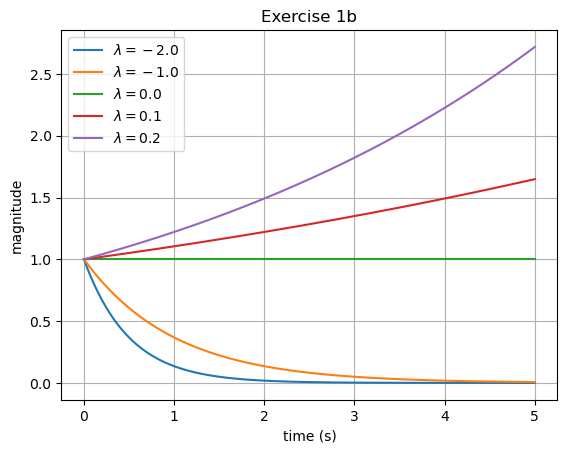

In [3]:
# Plot solution
labels=['$\lambda='+str(L)+'$' for L in L_vec]

fig = plt.figure()
ax = plt.subplot()
ax.plot(t_vec, x_vec.T)
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.title('Exercise 1b')
plt.legend(labels)
plt.grid(True)

plt.savefig('1b_fig1.png')
plt.show()

### Excercise 2c

\begin{equation} \ddot{x} - \lambda x = 0 \end{equation}

In [4]:
# Define the system of equations
def odefunc_2c(t: float, x: ArrayLike, L) -> ArrayLike:
    A = np.array([[0, 1], [L, 0]])
    return A @ x

# Initial conditions
x0 = np.array([1, 0])

In [5]:
# Solve the ODE
L_vec = [-1, 1]
teval = np.arange(0, 10.1, 0.1)
x2c = np.empty((2, len(teval)))
for i, L in enumerate(L_vec):
    solution_2c = solve_ivp(odefunc_2c, (0, 10), x0, 'RK45', teval, args=(L,))
    x2c[i, :] = solution_2c.y[0,:]

In [ ]:
# Plot results
for idx, (L, x) in enumerate(zip(L_vec, x2c)):
    fig = plt.figure()
    ax = plt.subplot()
    ax.plot(teval, x)
    plt.xlabel('time (s)')
    plt.ylabel('magnitude')
    plt.title(f'Exercise 2c, $\lambda={L}$, $x_0=1$, $\dot{{x}}=0$')
    plt.grid(True)
    plt.savefig(f'2c_fig{idx+1}.png')
plt.show()

### Exercise 3a

\begin{equation}
    \ddot{x} + 4 \dot{x} + 3 x = 0
\end{equation}

\begin{equation}
    \ddot{x} = -4 \dot{x} -3 x
\end{equation}

Let $x_1 = x$ and $x_2 = \dot{x}$

\begin{equation}
    \frac{d}{dt} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -3 & -4 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
\end{equation}

In [ ]:
A = np.array([[0, 1], [-3, -4]])
#######
# TODO: Define the A matrix
#######
Aa = A

L, _ = np.linalg.eig(Aa)
print(L)
#######
# TODO: Compute the eigenvalues
#######
eigvals_a = L # should be an np.ndarray of size (2,)

In [8]:
# Define the system of equations
def odefunc_a(t: float, x: ArrayLike) -> ArrayLike:
    dxdt = Aa @ x
    return dxdt

# Initial conditions
x0 = np.array([2, 20])  # x(0) = 2, x'(0) = 20

# Define time vectors
t_span = (0, 10)  # time from 0 to 10
dt = 0.1
t_eval = np.arange(t_span[0], t_span[1]+dt, 0.1)  # evaluation points from 0 to 10 with step size 0.1

In [9]:
# Solve the ODE 
solution_a = solve_ivp(fun=odefunc_a, t_span=t_span, y0=x0, t_eval=t_eval)

#######
# TODO: Extract the results; these will be checked by autograder
#######
t_values = solution_a.t
xa = solution_a.y

In [ ]:
# Plot results
fig = plt.figure()
ax = plt.subplot()
ax.plot(t_values, xa[0,:], label='$x$')
ax.plot(t_values, xa[1,:], label='$\dot{x}$')
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.title('Exercise 3a')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 3b

\begin{equation}
    \ddot{x} + 4 x = 0
\end{equation}

\begin{equation}
    \ddot{x} = -4 x
\end{equation}

Let $x_1 = x$ and $x_2 = \dot{x}$

\begin{equation}
    \frac{d}{dt} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -4 & 0 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
\end{equation}

In [ ]:
A = np.array([[0, 1], [-4, 0]])
#######
# TODO: Define the A matrix
#######
Ab = A

L, _ = np.linalg.eig(Ab)
print(L)
#######
# TODO: Compute the eigenvalues
#######
eigvals_b = L # should be an np.ndarray of size (2,)

In [12]:
# Define the system of equations
def odefunc_b(t: float, x: ArrayLike) -> ArrayLike:
    dxdt = Ab @ x
    return dxdt

# Initial conditions
x0 = np.array([1, -1])

In [13]:
# Solve the ODE
solution_b = solve_ivp(fun=odefunc_b, t_span=t_span, y0=x0, t_eval=t_eval)

#######
# TODO: Extract the results; these will be checked by autograder
#######
t_values = solution_b.t
xb = solution_b.y

In [ ]:
# Plot results
fig = plt.figure()
ax = plt.subplot()
ax.plot(t_values, xb[0,:], label='$x$')
ax.plot(t_values, xb[1,:], label='$\dot{x}$')
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.title('Exercise 3b')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 3c

\begin{equation}
    \ddot{x} - 2 \dot{x} - 8 x = 0
\end{equation}

\begin{equation}
    \ddot{x} = 2 \dot{x} + 8 x
\end{equation}

Let $x_1 = x$ and $x_2 = \dot{x}$

\begin{equation}
    \frac{d}{dt} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 8 & 2 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
\end{equation}

In [ ]:
A = np.array([[0, 1], [8, 2]])
#######
# TODO: Define the A matrixquestion: is the solution checked to within a fixed tolerance, or a fixed percentage? If something like np.allclose() is used, then 
#######
Ac = A

L, _ = np.linalg.eig(Ac)
print(L)
#######
# TODO: Compute the eigenvalues
#######
eigvals_c = L # should be an np.ndarray of size (2,)

In [16]:
# Define the system of equations
def odefunc_c(t: float, x: ArrayLike) -> ArrayLike:
    dxdt = Ac @ x
    return dxdt

# Initial conditions
x0 = np.array([0, 1])

In [17]:
# Solve the ODE
solution_c = solve_ivp(fun=odefunc_c, t_span=t_span, y0=x0, t_eval=t_eval)

#######
# TODO: Extract the results; these will be checked by autograder
#######
t_values = solution_c.t
xc = solution_c.y

In [ ]:
# Plot results
fig = plt.figure()
ax = plt.subplot()
ax.plot(t_values, xc[0, :], label='$x$')
ax.plot(t_values, xc[1, :], label='$\dot{x}$')
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.title('Exercise 3c')
plt.legend()
plt.grid(True)
plt.show()